CALCULO DEL INDICE DE CALOR


El índice de calor o sensación térmica es una medida que combina la temperatura y la humedad relativa para reflejar cómo se siente realmente el calor en el cuerpo humano. A medida que la humedad aumenta, el cuerpo tiene más dificultad para enfriar mediante la evaporación del sudor, lo que hace que la sensación térmica sea mayor que la temperatura real.

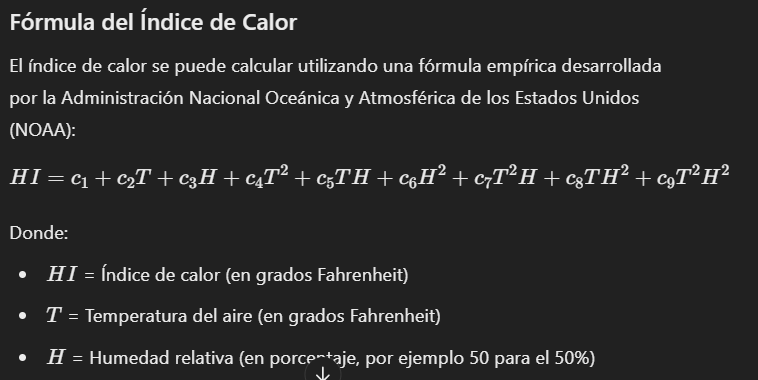

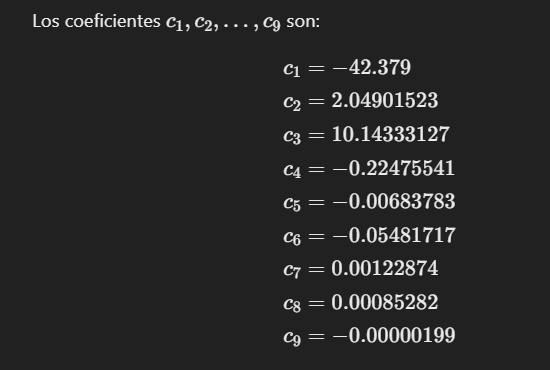

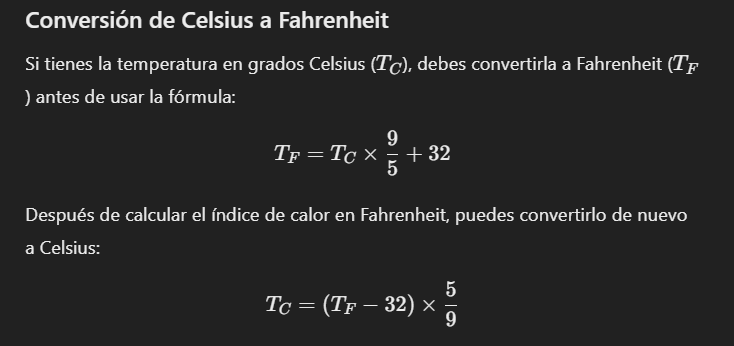

In [8]:
def calcular_heat_index(T, H):
    # T: temperatura en grados Celsius
    # H: humedad relativa en porcentaje (por ejemplo, 50 para 50%)

    # Convertir temperatura de Celsius a Fahrenheit
    T_F = T * 9 / 5 + 32

    # Coeficientes para la fórmula
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -0.00683783
    c6 = -0.05481717
    c7 = 0.00122874
    c8 = 0.00085282
    c9 = -0.00000199

    # Calcular índice de calor en Fahrenheit
    HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
            (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
            (c9 * T_F**2 * H**2))

    # Convertir índice de calor de Fahrenheit a Celsius
    HI_C = (HI_F - 32) * 5 / 9
    return HI_C

# Ejemplo de uso
temperatura = 23.6  # Temperatura en grados Celsius
humedad = 49        # Humedad relativa en porcentaje
heat_index = calcular_heat_index(temperatura, humedad)

print(f"El índice de calor es: {heat_index:.2f} °C")

El índice de calor es: -204.50 °C


Si la temperatura es de 30°C y la humedad es del 70%, el índice de calor (sensación térmica) sería mayor que 30°C debido a la alta humedad, lo que refleja la incomodidad que se siente cuando hay una alta humedad relativa.

In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Función para calcular el índice de calor
def calcular_heat_index(T, H):
    # T: temperatura en grados Celsius
    # H: humedad relativa en porcentaje (por ejemplo, 50 para 50%)

    # Convertir temperatura de Celsius a Fahrenheit
    T_F = T * 9 / 5 + 32

    # Coeficientes para la fórmula
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -0.00683783
    c6 = -0.05481717
    c7 = 0.00122874
    c8 = 0.00085282
    c9 = -0.00000199

    # Calcular índice de calor en Fahrenheit
    HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
            (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
            (c9 * T_F**2 * H**2))

    # Convertir índice de calor de Fahrenheit a Celsius
    HI_C = (HI_F - 32) * 5 / 9
    return HI_C

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php' # URL de la API
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
    datos_json = respuesta.json() # Convertir la respuesta a JSON

    # Paso 2: Convertir el JSON en un DataFrame de pandas
    dfapi = pd.DataFrame(datos_json)

    # Asegurarse de que las columnas de temperatura y humedad sean numéricas
    dfapi['temperatura'] = pd.to_numeric(dfapi['temperatura'], errors='coerce')
    dfapi['humedad'] = pd.to_numeric(dfapi['humedad'], errors='coerce')

    # Paso 3: Calcular el índice de calor
    dfapi['heatIndex_calculado'] = dfapi.apply(lambda row: calcular_heat_index(row['temperatura'], row['humedad']), axis=1)

    # Paso 4: Visualizar los primeros registros del dataset
    print(dfapi[['fecha', 'temperatura', 'humedad', 'heatIndex_calculado']].head())

    # (Opcional) Guardar el dataset como un archivo CSV
    dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False) # Guardar sin el índice
else:
    print(f"Error en la solicitud: {respuesta.status_code}")


                 fecha  temperatura  humedad  heatIndex_calculado
0  2024-09-24 21:26:50         23.6       49          -204.500819
1  2024-09-24 20:56:49         24.5       48          -233.284333
2  2024-09-24 20:26:48         24.4       47          -240.263113
3  2024-09-24 19:56:47         24.5       46          -251.732454
4  2024-09-24 19:26:46         24.9       42          -298.147302


El problema se debe a que la fórmula del índice de calor se desarrolló principalmente para temperaturas altas, es decir, sobre los 26.7°C (80°F). Cuando la temperatura es menor a este valor, la fórmula empírica puede producir resultados irreales (negativos o inusualmente bajos). En esos casos, el índice de calor tiende a igualar la temperatura real, porque a temperaturas más bajas, la humedad no tiene tanto efecto sobre la sensación térmica.

Para corregir esto, podemos implementar una lógica condicional. Si la temperatura es inferior a 26.7°C (80°F), simplemente usamos la temperatura real como índice de calor, ya que los efectos del calor y la humedad no son tan significativos en temperaturas bajas.

In [18]:
def calcular_heat_index(T, H):
    # T: temperatura en grados Celsius
    # H: humedad relativa en porcentaje (por ejemplo, 50 para 50%)

    # Convertir temperatura de Celsius a Fahrenheit
    T_F = T * 9 / 5 + 32

    # Si la temperatura es inferior a 26.7°C (80°F), el índice de calor es la temperatura misma
    if T_F < 80:
        return T  # Retornamos la temperatura en Celsius directamente

    # Coeficientes para la fórmula
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -0.00683783
    c6 = -0.05481717
    c7 = 0.00122874
    c8 = 0.00085282
    c9 = -0.00000199

    # Calcular índice de calor en Fahrenheit
    HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
            (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
            (c9 * T_F**2 * H**2))

    # Convertir índice de calor de Fahrenheit a Celsius
    HI_C = (HI_F - 32) * 5 / 9
    return HI_C

# Ejemplo de uso
temperatura = 23.6  # Temperatura en grados Celsius
humedad = 49        # Humedad relativa en porcentaje
heat_index = calcular_heat_index(temperatura, humedad)

print(f"El índice de calor es: {heat_index:.2f} °C")


El índice de calor es: 23.60 °C


TAREA (intentar terminarla para las siguientes dos clases):
1.Hacer regresión múltiple para estimar el índice de calor (sensación térmica cuantitativa) en función de la temperatura y humedad.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Función para calcular el índice de calor (sensación térmica)
def calcular_heat_index(T, H):
    T_F = T * 9 / 5 + 32
    if T_F < 80:
        return T  # Retornamos la temperatura en Celsius directamente
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -0.00683783
    c6 = -0.05481717
    c7 = 0.00122874
    c8 = 0.00085282
    c9 = -0.00000199
    HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
            (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
            (c9 * T_F**2 * H**2))
    HI_C = (HI_F - 32) * 5 / 9
    return HI_C


url = 'http://idc.ventusarca.com.co/getdata2.php'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    datos_json = respuesta.json()
    dfapi = pd.DataFrame(datos_json)

    # Convertir las columnas a numéricas
    dfapi['temperatura'] = pd.to_numeric(dfapi['temperatura'], errors='coerce')
    dfapi['humedad'] = pd.to_numeric(dfapi['humedad'], errors='coerce')

    # Calcular el índice de calor usando la fórmula
    dfapi['heatIndex'] = dfapi.apply(lambda row: calcular_heat_index(row['temperatura'], row['humedad']), axis=1)

    # Seleccionar las variables independientes (X) y la variable dependiente (y)
    X = dfapi[['temperatura', 'humedad']]  # Variables independientes (predictoras)
    y = dfapi['heatIndex']  # Variable dependiente (objetivo)

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear el modelo de regresión lineal
    modelo = LinearRegression()

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Coeficientes del modelo:", modelo.coef_)
    print("Intercepto:", modelo.intercept_)
    print("Error cuadrático medio (MSE):", mse)
    print("R-cuadrado (R2):", r2)

    # Visualización de los resultados
    resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
    print(resultados.head())
else:
    print(f"Error en la solicitud: {respuesta.status_code}")


Coeficientes del modelo: [-5.68791565  0.4667886 ]
Intercepto: 112.74619637016872
Error cuadrático medio (MSE): 2944.7397990174904
R-cuadrado (R2): 0.1220124604979258
      Real  Predicción
555   22.6   11.273041
3491  19.7   35.703403
527   26.3  -14.906921
3925  18.7   45.592416
2989  24.3    1.603585


2.Crear una columna que se llame sensación térmica para describirla cualitativamente en 5 categorías (muy baja, baja, media, alta, muy alta).

In [20]:
import pandas as pd
import requests

# Cargar datos desde la API
url = 'http://idc.ventusarca.com.co/getdata2.php'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    datos_json = respuesta.json()
    dfapi = pd.DataFrame(datos_json)

    # Convertir las columnas a numéricas
    dfapi['temperatura'] = pd.to_numeric(dfapi['temperatura'], errors='coerce')
    dfapi['humedad'] = pd.to_numeric(dfapi['humedad'], errors='coerce')

    # Función para calcular el índice de calor
    def calcular_heat_index(T, H):
        T_F = T * 9 / 5 + 32
        if T_F < 80:
            return T  # Retornamos la temperatura en Celsius directamente
        c1 = -42.379
        c2 = 2.04901523
        c3 = 10.14333127
        c4 = -0.22475541
        c5 = -0.00683783
        c6 = -0.05481717
        c7 = 0.00122874
        c8 = 0.00085282
        c9 = -0.00000199
        HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
                (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
                (c9 * T_F**2 * H**2))
        HI_C = (HI_F - 32) * 5 / 9
        return HI_C

    # Calcular el índice de calor
    dfapi['heatIndex'] = dfapi.apply(lambda row: calcular_heat_index(row['temperatura'], row['humedad']), axis=1)

    # Función para categorizar la sensación térmica
    def clasificar_sensacion_termica(heat_index):
        if heat_index < 10:
            return "Muy baja"
        elif 10 <= heat_index < 21:
            return "Baja"
        elif 21 <= heat_index < 31:
            return "Media"
        elif 31 <= heat_index < 41:
            return "Alta"
        else:
            return "Muy alta"

    # Crear la columna de sensación térmica
    dfapi['sensacion_termica'] = dfapi['heatIndex'].apply(clasificar_sensacion_termica)

    # Mostrar los primeros registros con la nueva columna
    print(dfapi[['temperatura', 'humedad', 'heatIndex', 'sensacion_termica']].head())
else:
    print(f"Error en la solicitud: {respuesta.status_code}")


   temperatura  humedad  heatIndex sensacion_termica
0         23.6       49       23.6             Media
1         24.5       48       24.5             Media
2         24.4       47       24.4             Media
3         24.5       46       24.5             Media
4         24.9       42       24.9             Media


In [23]:
dfapi

,id,fecha,temperatura,humedad,heatIndex,sensacion_termica,sensacion_termica_num
0,4757,2024-09-24 21:26:50,23.6,49,-204.500819,Muy baja,4
1,4756,2024-09-24 20:56:49,24.5,48,-233.284333,Muy baja,4
2,4755,2024-09-24 20:26:48,24.4,47,-240.263113,Muy baja,4
3,4754,2024-09-24 19:56:47,24.5,46,-251.732454,Muy baja,4
4,4753,2024-09-24 19:26:46,24.9,42,-298.147302,Muy baja,4
...,...,...,...,...,...,...,...
3995,762,2024-07-01 19:15:05,21.5,82,118.187010,Muy alta,3
3996,761,2024-07-01 18:45:04,21.8,81,106.051777,Muy alta,3
3997,760,2024-07-01 18:15:03,22.1,82,110.776317,Muy alta,3
3998,759,2024-07-01 17:45:02,22.3,81,99.683458,Muy alta,3


3.Con lo anterior, investigar cómo se puede estimar la categoría de la sensación térmica usando regresión logística (la cual es usada para clasificación) en dos escenarios: A) Solo teniendo en cuenta la variable índice de calor, y B) teniendo en cuenta tres variables: temperatura, humedad e índice de calor.

In [21]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Cargar datos desde la API
url = 'http://idc.ventusarca.com.co/getdata2.php'
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos_json = respuesta.json()
    dfapi = pd.DataFrame(datos_json)

    # Convertir las columnas a numéricas
    dfapi['temperatura'] = pd.to_numeric(dfapi['temperatura'], errors='coerce')
    dfapi['humedad'] = pd.to_numeric(dfapi['humedad'], errors='coerce')

    # Función para calcular el índice de calor
    def calcular_heat_index(T, H):
        T_F = T * 9 / 5 + 32
        c1 = -42.379
        c2 = 2.04901523
        c3 = 10.14333127
        c4 = -0.22475541
        c5 = -0.00683783
        c6 = -0.05481717
        c7 = 0.00122874
        c8 = 0.00085282
        c9 = -0.00000199
        HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
                (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
                (c9 * T_F**2 * H**2))
        HI_C = (HI_F - 32) * 5 / 9
        return HI_C

    # Calcular el índice de calor
    dfapi['heatIndex'] = dfapi.apply(lambda row: calcular_heat_index(row['temperatura'], row['humedad']), axis=1)

    # Función para categorizar la sensación térmica
    def clasificar_sensacion_termica(heat_index):
        if heat_index < 10:
            return "Muy baja"
        elif 10 <= heat_index < 21:
            return "Baja"
        elif 21 <= heat_index < 31:
            return "Media"
        elif 31 <= heat_index < 41:
            return "Alta"
        else:
            return "Muy alta"

    # Crear la columna de sensación térmica
    dfapi['sensacion_termica'] = dfapi['heatIndex'].apply(clasificar_sensacion_termica)

    # Codificar la variable categórica a numérica
    le = LabelEncoder()
    dfapi['sensacion_termica'] = le.fit_transform(dfapi['sensacion_termica'])

    # Escenario A: Usar solo el índice de calor
    X_A = dfapi[['heatIndex']]
    y_A = dfapi['sensacion_termica']

    # Dividir el conjunto de datos
    X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=42)

    # Entrenar el modelo
    modelo_A = LogisticRegression()
    modelo_A.fit(X_train_A, y_train_A)

    # Realizar predicciones
    y_pred_A = modelo_A.predict(X_test_A)

    # Evaluar el modelo
    print("Escenario A: Solo índice de calor")
    print(confusion_matrix(y_test_A, y_pred_A))
    print(classification_report(y_test_A, y_pred_A, target_names=le.classes_))

    # Escenario B: Usar temperatura, humedad e índice de calor
    X_B = dfapi[['temperatura', 'humedad', 'heatIndex']]
    y_B = dfapi['sensacion_termica']

    # Dividir el conjunto de datos
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, random_state=42)

    # Entrenar el modelo
    modelo_B = LogisticRegression()
    modelo_B.fit(X_train_B, y_train_B)

    # Realizar predicciones
    y_pred_B = modelo_B.predict(X_test_B)

    # Evaluar el modelo
    print("Escenario B: Temperatura, humedad e índice de calor")
    print(confusion_matrix(y_test_B, y_pred_B))
    print(classification_report(y_test_B, y_pred_B, target_names=le.classes_))

else:
    print(f"Error en la solicitud: {respuesta.status_code}")


Escenario A: Solo índice de calor
[[ 19   0   0   2   0]
 [  0  26   0   0   1]
 [  0   0  25   0   0]
 [  0   0   0 173   0]
 [  0   0   0   0 554]]
              precision    recall  f1-score   support

        Alta       1.00      0.90      0.95        21
        Baja       1.00      0.96      0.98        27
       Media       1.00      1.00      1.00        25
    Muy alta       0.99      1.00      0.99       173
    Muy baja       1.00      1.00      1.00       554

    accuracy                           1.00       800
   macro avg       1.00      0.97      0.98       800
weighted avg       1.00      1.00      1.00       800

Escenario B: Temperatura, humedad e índice de calor
[[ 19   0   0   2   0]
 [  0  25   1   0   1]
 [  2   1  22   0   0]
 [  2   0   0 171   0]
 [  0   0   0   0 554]]
              precision    recall  f1-score   support

        Alta       0.83      0.90      0.86        21
        Baja       0.96      0.93      0.94        27
       Media       0.96      0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

4.Graficar las siguientes series temporales:

Temperatura vs Fecha
Humedad vs Fecha
Índice de calor vs Fecha
Sensación térmica vs Fecha

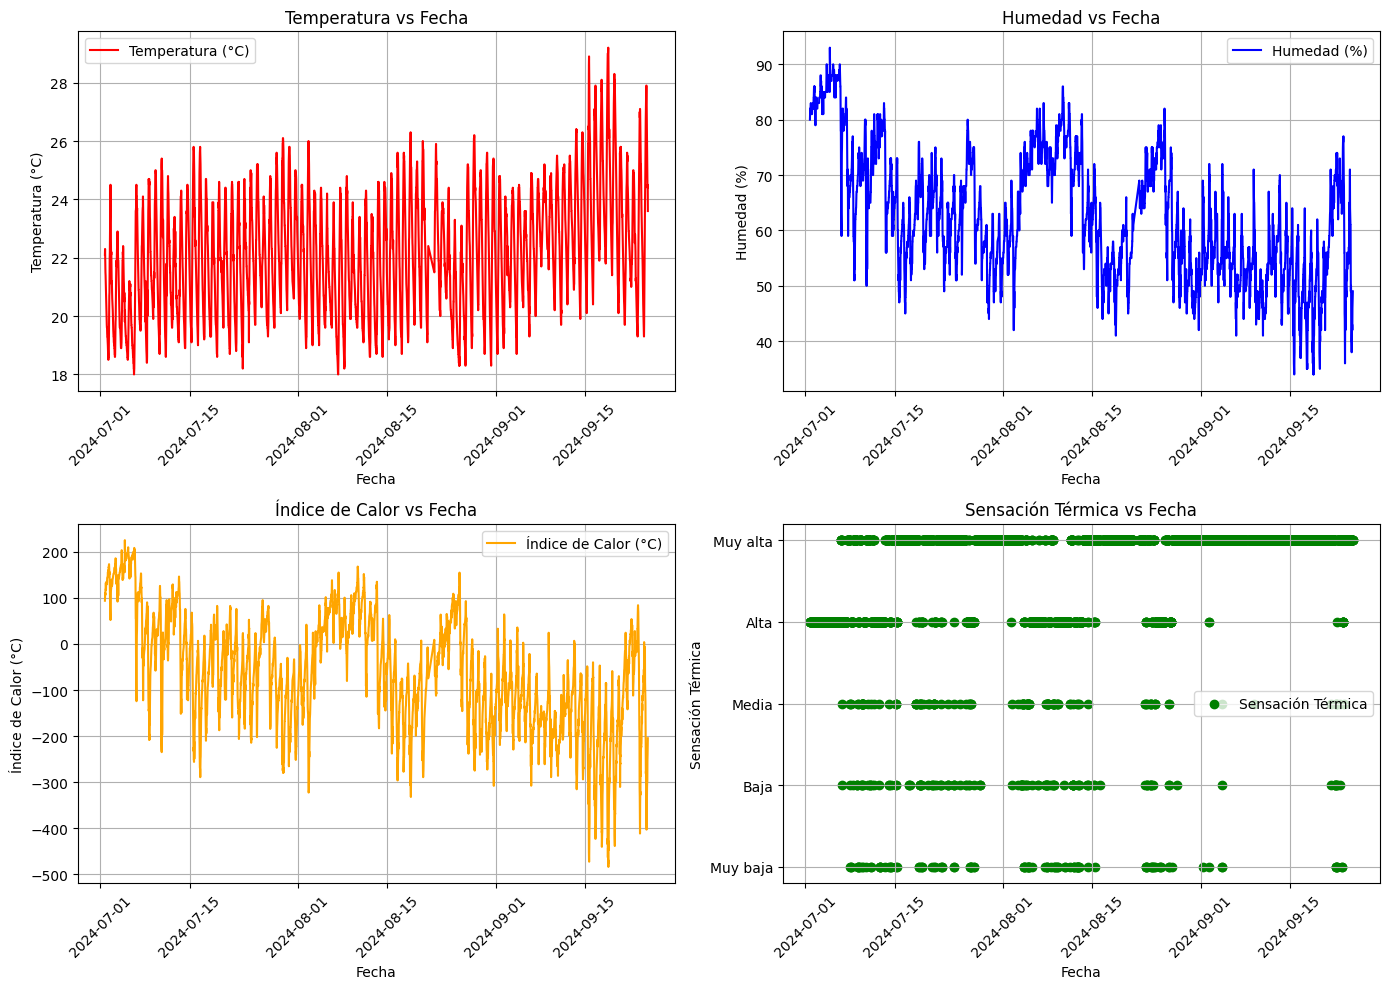

In [22]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Cargar datos desde la API
url = 'http://idc.ventusarca.com.co/getdata2.php'
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos_json = respuesta.json()
    dfapi = pd.DataFrame(datos_json)

    # Convertir las columnas a numéricas
    dfapi['temperatura'] = pd.to_numeric(dfapi['temperatura'], errors='coerce')
    dfapi['humedad'] = pd.to_numeric(dfapi['humedad'], errors='coerce')
    dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])

    # Calcular el índice de calor
    def calcular_heat_index(T, H):
        T_F = T * 9 / 5 + 32
        c1 = -42.379
        c2 = 2.04901523
        c3 = 10.14333127
        c4 = -0.22475541
        c5 = -0.00683783
        c6 = -0.05481717
        c7 = 0.00122874
        c8 = 0.00085282
        c9 = -0.00000199
        HI_F = (c1 + (c2 * T_F) + (c3 * H) + (c4 * T_F**2) + (c5 * T_F * H) +
                (c6 * H**2) + (c7 * T_F**2 * H) + (c8 * T_F * H**2) +
                (c9 * T_F**2 * H**2))
        HI_C = (HI_F - 32) * 5 / 9
        return HI_C

    # Calcular el índice de calor
    dfapi['heatIndex'] = dfapi.apply(lambda row: calcular_heat_index(row['temperatura'], row['humedad']), axis=1)

    # Función para clasificar la sensación térmica
    def clasificar_sensacion_termica(heat_index):
        if heat_index < 10:
            return "Muy baja"
        elif 10 <= heat_index < 21:
            return "Baja"
        elif 21 <= heat_index < 31:
            return "Media"
        elif 31 <= heat_index < 41:
            return "Alta"
        else:
            return "Muy alta"

    # Crear la columna de sensación térmica
    dfapi['sensacion_termica'] = dfapi['heatIndex'].apply(clasificar_sensacion_termica)

    # Graficar las series temporales
    plt.figure(figsize=(14, 10))

    # Gráfico de Temperatura vs Fecha
    plt.subplot(2, 2, 1)
    plt.plot(dfapi['fecha'], dfapi['temperatura'], color='red', label='Temperatura (°C)')
    plt.title('Temperatura vs Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    # Gráfico de Humedad vs Fecha
    plt.subplot(2, 2, 2)
    plt.plot(dfapi['fecha'], dfapi['humedad'], color='blue', label='Humedad (%)')
    plt.title('Humedad vs Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Humedad (%)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    # Gráfico de Índice de Calor vs Fecha
    plt.subplot(2, 2, 3)
    plt.plot(dfapi['fecha'], dfapi['heatIndex'], color='orange', label='Índice de Calor (°C)')
    plt.title('Índice de Calor vs Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Índice de Calor (°C)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    # Gráfico de Sensación Térmica vs Fecha
    plt.subplot(2, 2, 4)
    # Para este gráfico, convertimos la sensación térmica a valores numéricos para graficar
    dfapi['sensacion_termica_num'] = dfapi['sensacion_termica'].astype('category').cat.codes
    plt.scatter(dfapi['fecha'], dfapi['sensacion_termica_num'], color='green', label='Sensación Térmica')
    plt.yticks([0, 1, 2, 3, 4], ['Muy baja', 'Baja', 'Media', 'Alta', 'Muy alta'])
    plt.title('Sensación Térmica vs Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Sensación Térmica')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print(f"Error en la solicitud: {respuesta.status_code}")
